In [1]:
!git clone https://github.com/johnhallman/tigercontrol.git
!pip install -e tigercontrol

Cloning into 'tigercontrol'...
remote: Enumerating objects: 545, done.
remote: Counting objects: 100% (545/545), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 5926 (delta 387), reused 469 (delta 335), pack-reused 5381
Receiving objects: 100% (5926/5926), 15.13 MiB | 2.77 MiB/s, done.
Resolving deltas: 100% (4132/4132), done.
Obtaining file:///Users/alexjyu/tigercontrol/docs/tigercontrol
  Found existing installation: tigercontrol 0.1
    Uninstalling tigercontrol-0.1:
      Successfully uninstalled tigercontrol-0.1
  Running setup.py develop for tigercontrol


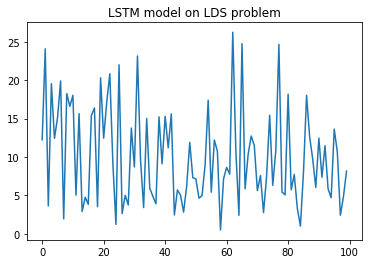

test_lstm passed


In [4]:
import tigercontrol
import numpy as onp
import jax.numpy as np
import jax.random as random
import matplotlib.pyplot as plt
from tigercontrol.utils import generate_key
from tigercontrol.utils.download_tools import get_tigercontrol_dir
import os
%matplotlib inline

def test_lstm(steps=100, show_plot=True):
    T = steps 
    n, m, l, d = 4, 5, 10, 10
    problem = tigercontrol.problem("LDS-Control-v0")
    y_true = problem.initialize(n, m, d)
    model = tigercontrol.model("LSTM")
    model.initialize(n, m, l, d)
    loss = lambda pred, true: np.sum((pred - true)**2)
 
    results = []
    for i in range(T):
        u = random.normal(generate_key(), (n,))
        y_pred = model.predict(u)
        y_true = problem.step(u)
        results.append(loss(y_true, y_pred))
        model.update(y_true)

    if show_plot:
        plt.plot(results)
        plt.title("LSTM model on LDS problem")
        plt.show(block=False)
        plt.pause(3)
        plt.close()
    print("test_lstm passed")

test_lstm()